In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.optimizers import RMSprop,Adam
import glob
from PIL import Image

# IGNORING UNNECESSARRY WARNINGS

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)


In [127]:
pip install imutils


  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=6cd3859c280affb827be3c8c01be6b5f7b596b83ad1361ba85edf91538fbdbb8
  Stored in directory: c:\users\mani\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils


In [129]:
from imutils import paths
import cv2


In [134]:
imagePath=list(paths.list_images(r"C:\Users\Mani\Desktop\dmml2 dataset"))

In [135]:
imagePath

['C:\\Users\\Mani\\Desktop\\dmml2 dataset\\Br35H-Mask-RCNN\\TEST\\y701.jpg',
 'C:\\Users\\Mani\\Desktop\\dmml2 dataset\\Br35H-Mask-RCNN\\TEST\\y702.jpg',
 'C:\\Users\\Mani\\Desktop\\dmml2 dataset\\Br35H-Mask-RCNN\\TEST\\y703.jpg',
 'C:\\Users\\Mani\\Desktop\\dmml2 dataset\\Br35H-Mask-RCNN\\TEST\\y704.jpg',
 'C:\\Users\\Mani\\Desktop\\dmml2 dataset\\Br35H-Mask-RCNN\\TEST\\y705.jpg',
 'C:\\Users\\Mani\\Desktop\\dmml2 dataset\\Br35H-Mask-RCNN\\TEST\\y706.jpg',
 'C:\\Users\\Mani\\Desktop\\dmml2 dataset\\Br35H-Mask-RCNN\\TEST\\y707.jpg',
 'C:\\Users\\Mani\\Desktop\\dmml2 dataset\\Br35H-Mask-RCNN\\TEST\\y708.jpg',
 'C:\\Users\\Mani\\Desktop\\dmml2 dataset\\Br35H-Mask-RCNN\\TEST\\y709.jpg',
 'C:\\Users\\Mani\\Desktop\\dmml2 dataset\\Br35H-Mask-RCNN\\TEST\\y710.jpg',
 'C:\\Users\\Mani\\Desktop\\dmml2 dataset\\Br35H-Mask-RCNN\\TEST\\y711.jpg',
 'C:\\Users\\Mani\\Desktop\\dmml2 dataset\\Br35H-Mask-RCNN\\TEST\\y712.jpg',
 'C:\\Users\\Mani\\Desktop\\dmml2 dataset\\Br35H-Mask-RCNN\\TEST\\y713.jpg',

In [137]:
No_JPG_Path=list(paths.list_images(r"C:\Users\Mani\Desktop\dmml2 dataset/no"))
Yes_JPG_Path=list(paths.list_images(r"C:\Users\Mani\Desktop\dmml2 dataset/yes"))

In [138]:
print(No_JPG_Path[0:5])
print("-----"*20)
print(Yes_JPG_Path[0:5])


['C:\\Users\\Mani\\Desktop\\dmml2 dataset/no\\no0.jpg', 'C:\\Users\\Mani\\Desktop\\dmml2 dataset/no\\no1.jpg', 'C:\\Users\\Mani\\Desktop\\dmml2 dataset/no\\no10.jpg', 'C:\\Users\\Mani\\Desktop\\dmml2 dataset/no\\no100.jpg', 'C:\\Users\\Mani\\Desktop\\dmml2 dataset/no\\no1000.jpg']
----------------------------------------------------------------------------------------------------
['C:\\Users\\Mani\\Desktop\\dmml2 dataset/yes\\y0.jpg', 'C:\\Users\\Mani\\Desktop\\dmml2 dataset/yes\\y1.jpg', 'C:\\Users\\Mani\\Desktop\\dmml2 dataset/yes\\y10.jpg', 'C:\\Users\\Mani\\Desktop\\dmml2 dataset/yes\\y100.jpg', 'C:\\Users\\Mani\\Desktop\\dmml2 dataset/yes\\y1000.jpg']


In [141]:
Yes_No_List = []

for No_JPG in No_JPG_Path:
    Yes_No_List.append(No_JPG)
    
for Yes_JPG in Yes_JPG_Path:
    Yes_No_List.append(Yes_JPG)

In [142]:
print(Yes_No_List[0:10])


['C:\\Users\\Mani\\Desktop\\dmml2 dataset/no\\no0.jpg', 'C:\\Users\\Mani\\Desktop\\dmml2 dataset/no\\no1.jpg', 'C:\\Users\\Mani\\Desktop\\dmml2 dataset/no\\no10.jpg', 'C:\\Users\\Mani\\Desktop\\dmml2 dataset/no\\no100.jpg', 'C:\\Users\\Mani\\Desktop\\dmml2 dataset/no\\no1000.jpg', 'C:\\Users\\Mani\\Desktop\\dmml2 dataset/no\\no1001.jpg', 'C:\\Users\\Mani\\Desktop\\dmml2 dataset/no\\no1002.jpg', 'C:\\Users\\Mani\\Desktop\\dmml2 dataset/no\\no1003.jpg', 'C:\\Users\\Mani\\Desktop\\dmml2 dataset/no\\no1004.jpg', 'C:\\Users\\Mani\\Desktop\\dmml2 dataset/no\\no1005.jpg']


In [143]:
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Yes_No_List))

In [144]:
print(JPG_Labels[0:10])

['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']


In [145]:
print("NO COUNTING: ", JPG_Labels.count("no"))
print("YES COUNTING: ", JPG_Labels.count("yes"))

NO COUNTING:  1500
YES COUNTING:  1500


In [146]:
JPG_Path_Series = pd.Series(Yes_No_List,name="JPG").astype(str)
JPG_Category_Series = pd.Series(JPG_Labels,name="TUMOR_CATEGORY")


In [147]:
Main_Train_Data = pd.concat([JPG_Path_Series,JPG_Category_Series],axis=1)


In [148]:
print(Main_Train_Data.head(-1))

                                                    JPG TUMOR_CATEGORY
0        C:\Users\Mani\Desktop\dmml2 dataset/no\no0.jpg             no
1        C:\Users\Mani\Desktop\dmml2 dataset/no\no1.jpg             no
2       C:\Users\Mani\Desktop\dmml2 dataset/no\no10.jpg             no
3      C:\Users\Mani\Desktop\dmml2 dataset/no\no100.jpg             no
4     C:\Users\Mani\Desktop\dmml2 dataset/no\no1000.jpg             no
...                                                 ...            ...
2994   C:\Users\Mani\Desktop\dmml2 dataset/yes\y994.jpg            yes
2995   C:\Users\Mani\Desktop\dmml2 dataset/yes\y995.jpg            yes
2996   C:\Users\Mani\Desktop\dmml2 dataset/yes\y996.jpg            yes
2997   C:\Users\Mani\Desktop\dmml2 dataset/yes\y997.jpg            yes
2998   C:\Users\Mani\Desktop\dmml2 dataset/yes\y998.jpg            yes

[2999 rows x 2 columns]


In [169]:
Test_JPG_Path = list(paths.list_images(r"C:\Users\Mani\Desktop\dmml2 dataset/pred"))

In [170]:
print(Test_JPG_Path[0:5])


['C:\\Users\\Mani\\Desktop\\dmml2 dataset/pred\\pred0.jpg', 'C:\\Users\\Mani\\Desktop\\dmml2 dataset/pred\\pred1.jpg', 'C:\\Users\\Mani\\Desktop\\dmml2 dataset/pred\\pred10.jpg', 'C:\\Users\\Mani\\Desktop\\dmml2 dataset/pred\\pred11.jpg', 'C:\\Users\\Mani\\Desktop\\dmml2 dataset/pred\\pred12.jpg']


In [171]:
Test_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_JPG_Path))


In [172]:
print(Test_JPG_Labels[0:5])


['pred', 'pred', 'pred', 'pred', 'pred']


In [173]:
Test_JPG_Path_Series = pd.Series(Test_JPG_Path,name="JPG").astype(str)
Test_JPG_Labels_Series = pd.Series(Test_JPG_Labels,name="TUMOR_CATEGORY")


In [174]:
Test_Data = pd.concat([Test_JPG_Path_Series,Test_JPG_Labels_Series],axis=1)


In [175]:
print(Test_Data.head())


                                                 JPG TUMOR_CATEGORY
0  C:\Users\Mani\Desktop\dmml2 dataset/pred\pred0...           pred
1  C:\Users\Mani\Desktop\dmml2 dataset/pred\pred1...           pred
2  C:\Users\Mani\Desktop\dmml2 dataset/pred\pred1...           pred
3  C:\Users\Mani\Desktop\dmml2 dataset/pred\pred1...           pred
4  C:\Users\Mani\Desktop\dmml2 dataset/pred\pred1...           pred


In [176]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)



Text(0.5, 1.0, 'no')

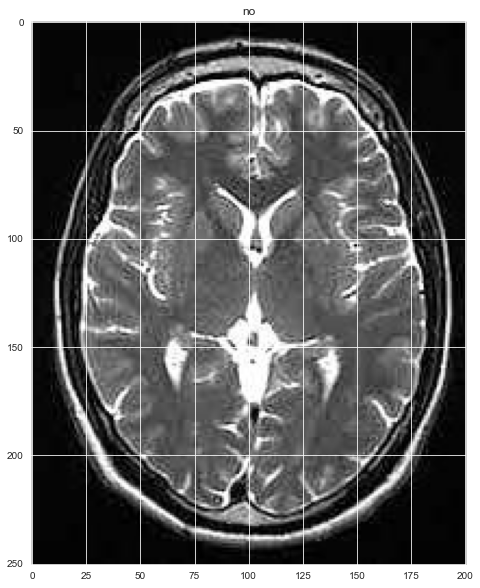

In [177]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(Main_Train_Data["JPG"][10]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][10])


Text(0.5, 1.0, 'yes')

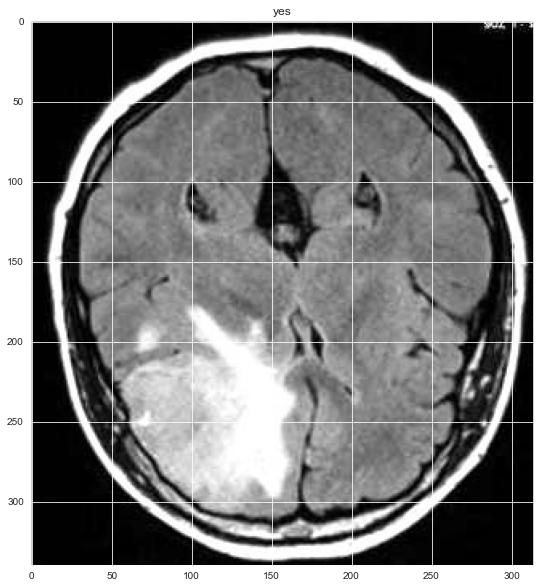

In [178]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(Main_Train_Data["JPG"][2997]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][2997])


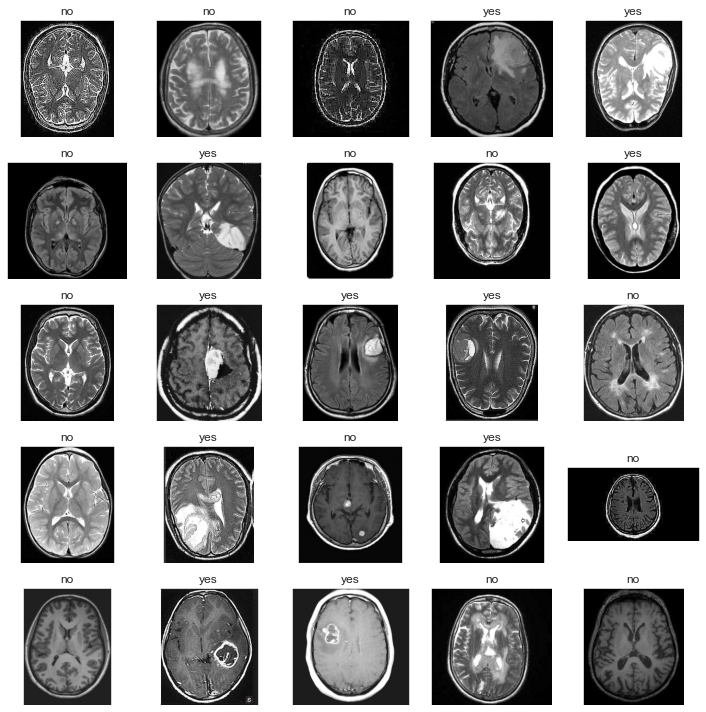

In [179]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Train_Data["JPG"][i]))
    ax.set_title(Main_Train_Data["TUMOR_CATEGORY"][i])
plt.tight_layout()
plt.show()


In [180]:
train_data,test_data = train_test_split(Main_Train_Data,train_size=0.9,random_state=42)

In [181]:
print(train_data.shape)


(2700, 2)


In [182]:
print(test_data.shape)


(300, 2)


In [183]:
print(test_data.head())


                                                    JPG TUMOR_CATEGORY
1801  C:\Users\Mani\Desktop\dmml2 dataset/yes\y1339.jpg            yes
1190  C:\Users\Mani\Desktop\dmml2 dataset/yes\y1061.jpg            yes
1817   C:\Users\Mani\Desktop\dmml2 dataset/no\no688.jpg             no
251    C:\Users\Mani\Desktop\dmml2 dataset/yes\y667.jpg            yes
2505   C:\Users\Mani\Desktop\dmml2 dataset/no\no918.jpg             no


In [185]:
Generator_Basic = ImageDataGenerator(rescale=1./255,
                                     validation_split=0.1)

In [186]:
Train_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))


Found 2430 validated image filenames belonging to 2 classes.


In [187]:
Validation_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))


Found 270 validated image filenames belonging to 2 classes.


In [188]:
Test_Set = Generator_Basic.flow_from_dataframe(dataframe=test_data,
                                              x_col="JPG",
                                              y_col="TUMOR_CATEGORY",
                                              color_mode="grayscale",
                                              class_mode="categorical",
                                              batch_size=20,
                                              target_size=(200,200))


Found 300 validated image filenames belonging to 2 classes.


In [189]:
for data_batch,label_batch in Train_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break


DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [190]:
for data_batch,label_batch in Validation_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break


DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [191]:
for data_batch,label_batch in Test_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [192]:
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)

{'no': 0, 'yes': 1}
[1, 0, 1, 1, 1]
(200, 200, 1)


In [193]:
print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)


{'no': 0, 'yes': 1}
[1, 0, 0, 1, 0]
(200, 200, 1)


In [194]:
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

{'no': 0, 'yes': 1}
[1, 1, 0, 1, 0]
(200, 200, 1)


In [195]:
Model = Sequential()

Model.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(64,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(128,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(256,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Flatten())
Model.add(Dropout(0.5))
Model.add(Dense(512,activation="relu"))
Model.add(Dense(2,activation="softmax"))


In [197]:
#MODEL COMPILE
Model.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])


In [198]:
Model.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])


In [199]:
#model fitting
ANN_Model = Model.fit(Train_Set,validation_data=Validation_Set,
                      epochs=30,steps_per_epoch=120)


Epoch 1/30
120/120 [==============================] - 154s 1s/step - loss: 0.6370 - accuracy: 0.7117 - val_loss: 0.4126 - val_accuracy: 0.8111
Epoch 2/30
120/120 [==============================] - 143s 1s/step - loss: 0.3980 - accuracy: 0.8163 - val_loss: 0.4929 - val_accuracy: 0.7741
Epoch 3/30
120/120 [==============================] - 142s 1s/step - loss: 0.3045 - accuracy: 0.8770 - val_loss: 0.4848 - val_accuracy: 0.7926
Epoch 4/30
120/120 [==============================] - 146s 1s/step - loss: 0.2448 - accuracy: 0.9046 - val_loss: 0.2618 - val_accuracy: 0.9037
Epoch 5/30
120/120 [==============================] - 145s 1s/step - loss: 0.1976 - accuracy: 0.9213 - val_loss: 0.1230 - val_accuracy: 0.9407
Epoch 6/30
120/120 [==============================] - 144s 1s/step - loss: 0.1676 - accuracy: 0.9377 - val_loss: 0.1282 - val_accuracy: 0.9556
Epoch 7/30
120/120 [==============================] - 143s 1s/step - loss: 0.1464 - accuracy: 0.9460 - val_loss: 0.1663 - val_accuracy: 0.9407

In [200]:
#model summary 
print(Model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 98, 98, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 64)        0

In [201]:
HistoryDict = ANN_Model.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)


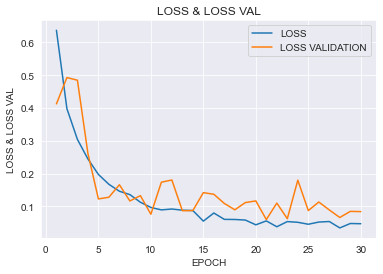

In [243]:
plt.plot(epochs,losses,label="LOSS")
plt.plot(epochs,val_losses,label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()


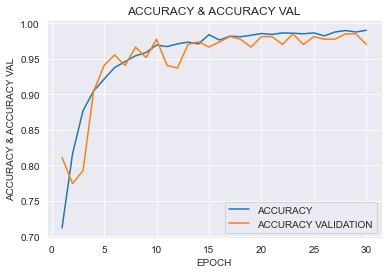

In [245]:
plt.plot(epochs,acc,label="ACCURACY")
plt.plot(epochs,val_acc,label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()


<AxesSubplot:>

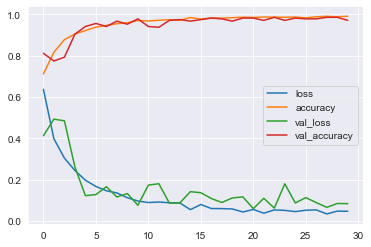

In [206]:
Dict_Summary = pd.DataFrame(ANN_Model.history)
Dict_Summary.plot()

In [239]:
#PREDICTION SCORE ON DIVIDED DATA
Model_Results = Model.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.1373
ACCURACY:  0.98


In [208]:
#PREDICTION PROCESS
Main_Data_Prediction = pd.DataFrame({"JPG":Test_JPG_Path_Series})


In [209]:
print(Main_Data_Prediction.head())


                                                 JPG
0  C:\Users\Mani\Desktop\dmml2 dataset/pred\pred0...
1  C:\Users\Mani\Desktop\dmml2 dataset/pred\pred1...
2  C:\Users\Mani\Desktop\dmml2 dataset/pred\pred1...
3  C:\Users\Mani\Desktop\dmml2 dataset/pred\pred1...
4  C:\Users\Mani\Desktop\dmml2 dataset/pred\pred1...


In [210]:
Main_Test_Generator = ImageDataGenerator(rescale=1./255)

In [211]:
Main_Test_Set = Main_Test_Generator.flow_from_dataframe(dataframe=Main_Data_Prediction,
                                                       x_col="JPG",
                                                       y_col=None,
                                                       color_mode="grayscale",
                                                        class_mode=None,
                                                        batch_size=20,
                                                        target_size=(200,200))


Found 60 validated image filenames.


In [212]:
Model_Test_Prediction = Model.predict(Main_Test_Set)

3/3 [==============================] - 2s 512ms/step


In [213]:
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)

In [214]:
print(Model_Test_Prediction)


[0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1]


In [215]:
Last_Prediction = []
[Last_Prediction.append('NO') if i == 1 else Last_Prediction.append('TUMOR') for i in Model_Test_Prediction]
print(Last_Prediction)


['TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO']


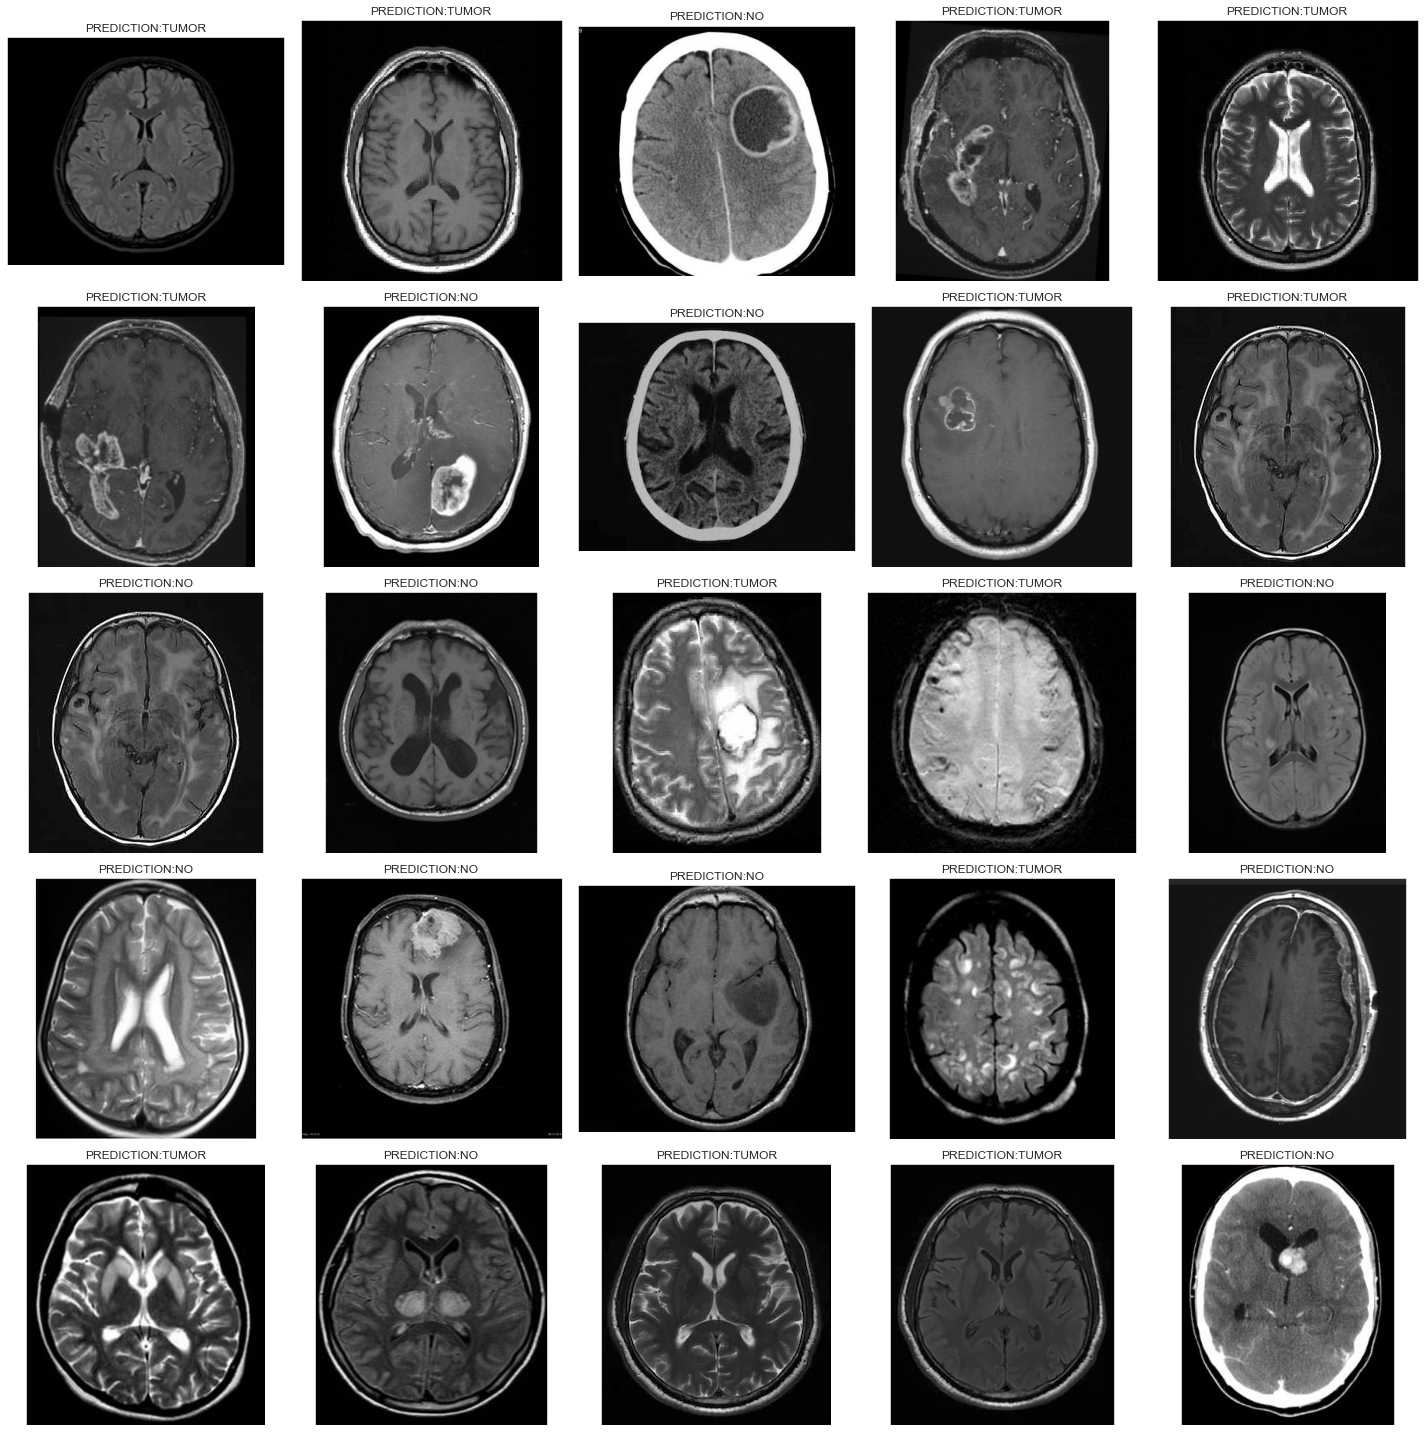

In [216]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data_Prediction["JPG"].loc[i]))
    ax.set_title(f"PREDICTION:{Last_Prediction[i]}")
plt.tight_layout()
plt.show()

In [217]:
Data_Generator_Div = ImageDataGenerator(rescale=1./255,brightness_range=[0.3,0.9],
                                       rotation_range=30,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode="nearest",
                                       validation_split=0.1)

In [218]:
Train_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))


Found 2430 validated image filenames belonging to 2 classes.


In [219]:
Validation_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))


Found 270 validated image filenames belonging to 2 classes.


In [220]:
Test_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=Main_Data_Prediction,
                                                       x_col="JPG",
                                                       y_col=None,
                                                       color_mode="grayscale",
                                                        class_mode=None,
                                                        batch_size=20,
                                                        target_size=(200,200))

Found 60 validated image filenames.


In [221]:
Model_Two = Sequential()

Model_Two.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(64,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(128,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(128,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(256,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Flatten())
Model_Two.add(Dropout(0.5))
Model_Two.add(Dense(512,activation="relu"))
Model_Two.add(Dense(2,activation="softmax"))

In [222]:
Model_Two.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])


In [223]:
ANN_Model_Two = Model_Two.fit(Train_Set_Div,
                              validation_data=Validation_Set_Div,
                              batch_size=20,
                      epochs=50)


Epoch 1/50
122/122 [==============================] - 121s 971ms/step - loss: 0.7143 - accuracy: 0.5362 - val_loss: 0.6568 - val_accuracy: 0.6259
Epoch 2/50
122/122 [==============================] - 118s 964ms/step - loss: 0.6616 - accuracy: 0.6214 - val_loss: 0.6441 - val_accuracy: 0.6481
Epoch 3/50
122/122 [==============================] - 118s 966ms/step - loss: 0.5895 - accuracy: 0.7021 - val_loss: 0.5466 - val_accuracy: 0.7444
Epoch 4/50
122/122 [==============================] - 118s 966ms/step - loss: 0.5646 - accuracy: 0.7333 - val_loss: 0.6170 - val_accuracy: 0.6148
Epoch 5/50
122/122 [==============================] - 118s 965ms/step - loss: 0.5499 - accuracy: 0.7551 - val_loss: 0.5108 - val_accuracy: 0.7593
Epoch 6/50
122/122 [==============================] - 115s 939ms/step - loss: 0.5216 - accuracy: 0.7572 - val_loss: 0.4813 - val_accuracy: 0.8000
Epoch 7/50
122/122 [==============================] - 150s 1s/step - loss: 0.5150 - accuracy: 0.7568 - val_loss: 0.4801 - va

In [224]:
print(Model_Two.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 196, 196, 32)      832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 98, 98, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 128)     

In [225]:
HistoryDict_Two = ANN_Model_Two.history

val_losses_Two = HistoryDict_Two["val_loss"]
val_acc_Two = HistoryDict_Two["val_accuracy"]
acc_Two = HistoryDict_Two["accuracy"]
losses_Two = HistoryDict_Two["loss"]
epochs_Two = range(1,len(val_losses_Two)+1)

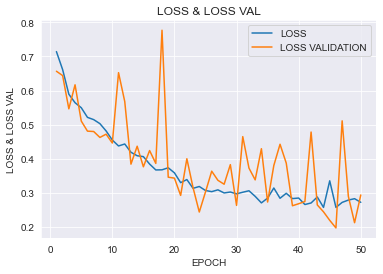

In [249]:
plt.plot(epochs_Two,losses_Two,label="LOSS")
plt.plot(epochs_Two,val_losses_Two,label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()


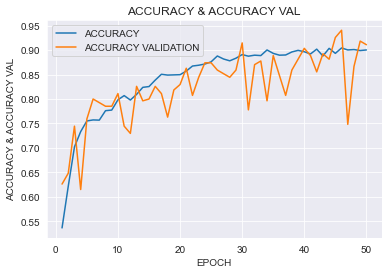

In [250]:
plt.plot(epochs_Two,acc_Two,label="ACCURACY")
plt.plot(epochs_Two,val_acc_Two,label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()


<AxesSubplot:>

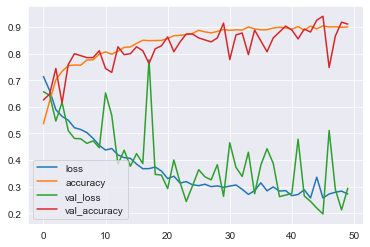

In [229]:
Dict_Summary_Two = pd.DataFrame(ANN_Model_Two.history)
Dict_Summary_Two.plot()


In [230]:
Model_Results_Two = Model_Two.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results_Two[0])
print("ACCURACY:  " + "%.2f" % Model_Results_Two[1])

LOSS:  0.7171
ACCURACY:  0.93


In [231]:
Model_Test_Prediction_Two = Model_Two.predict(Test_Set_Div)


3/3 [==============================] - 1s 391ms/step


In [232]:
Model_Test_Prediction_Two = Model_Test_Prediction_Two.argmax(axis=-1)

In [233]:
print(Model_Test_Prediction_Two)

[0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0
 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0]


In [234]:
Last_Prediction_Two = []
[Last_Prediction_Two.append('NO') if i == 1 else Last_Prediction_Two.append('TUMOR') for i in Model_Test_Prediction_Two]
print(Last_Prediction_Two)


['TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR']


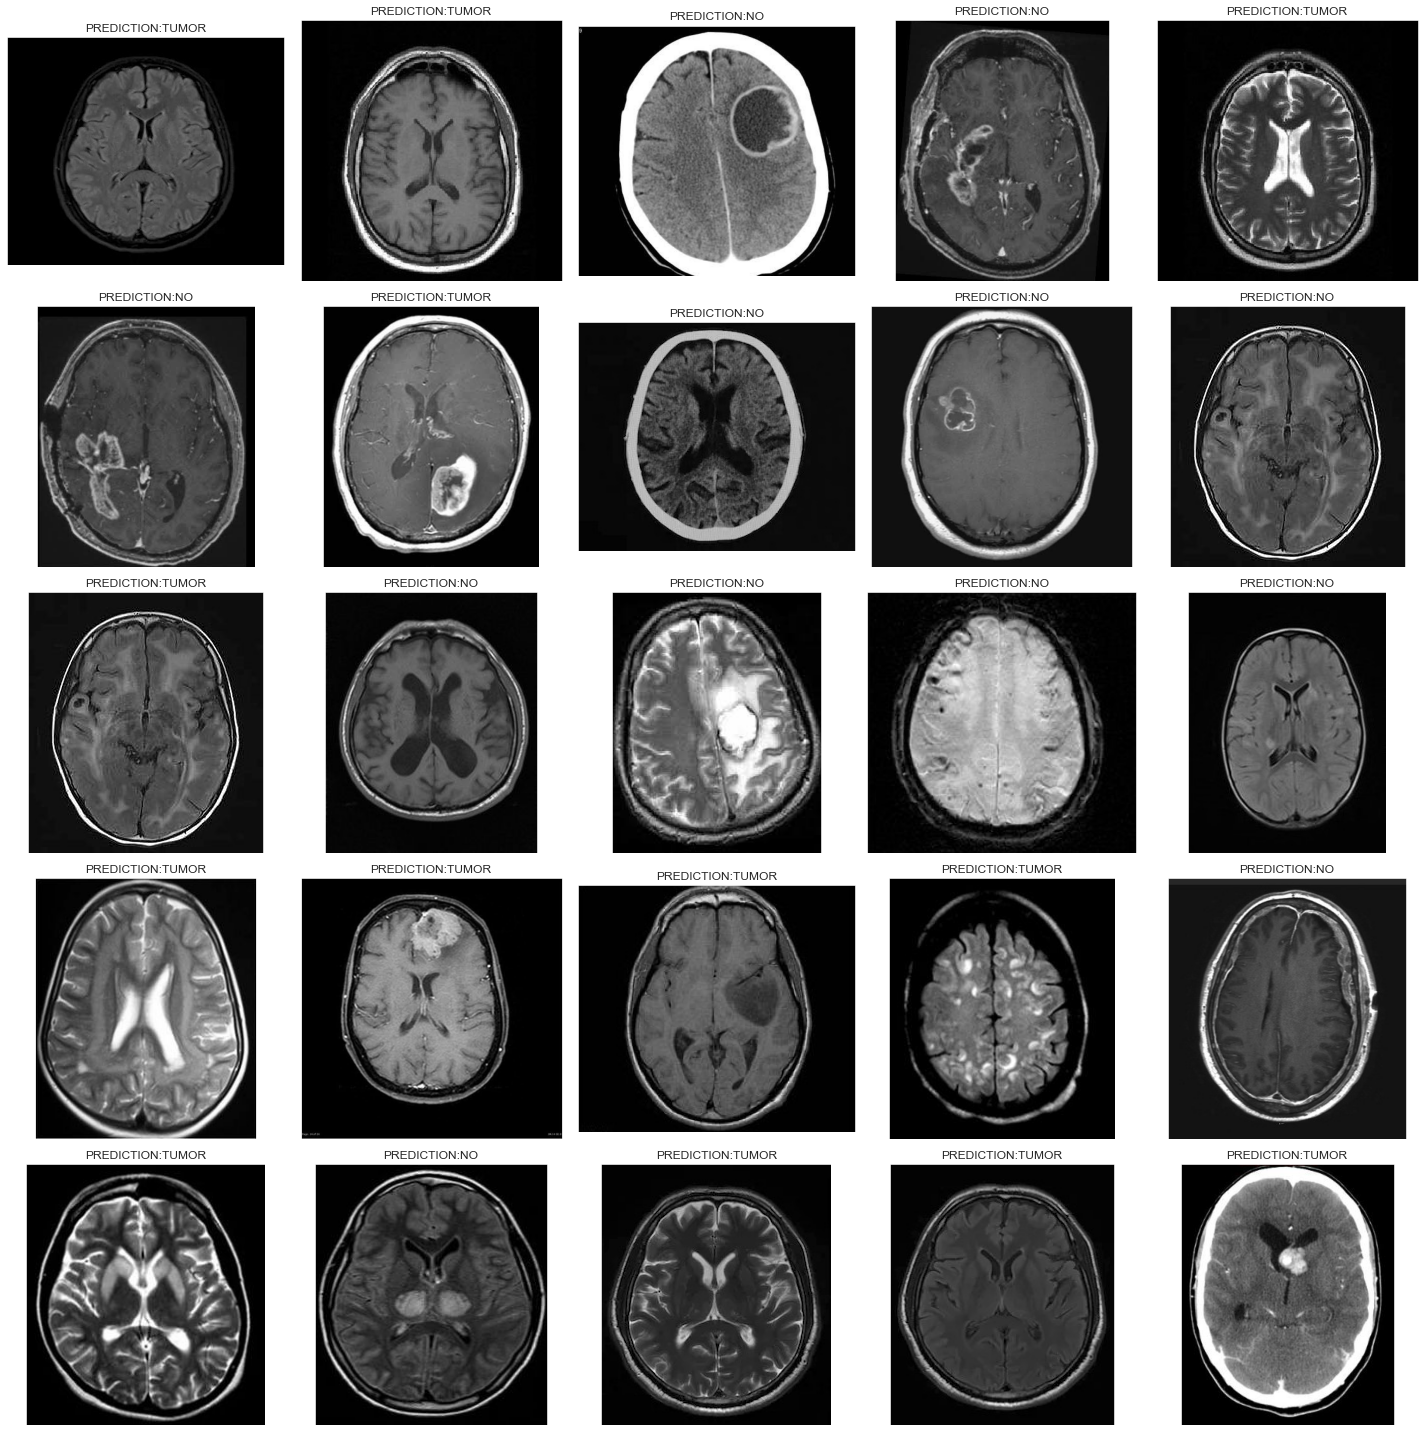

In [235]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data_Prediction["JPG"].loc[i]))
    ax.set_title(f"PREDICTION:{Last_Prediction_Two[i]}")
plt.tight_layout()
plt.show()
